# Pymaceuticals Inc.
---

### Analysis

- We can observe that there was almost a 50% of equality in the gender of the mice, but the effectiveness of Capomulin to reduce the tumor volume was being successful.
- With these same steps we could use it to determine if Ramicane was equally as successful, and we could even compare these two drugs.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
# Found http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html to assist counting the unique values in the DataFrame
number_mouse= mouse_df["Mouse ID"].nunique()
number_mouse

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dups_mice_id_df = mouse_df.loc[mouse_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dups_mice_id_df

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Assistance on how to drop duplicates found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
clean_df = mouse_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice= clean_df["Mouse ID"].nunique()
number_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_stdv = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({
                              "Mean Tumor Volume": summary_mean,
                              "Median Tumor Volume": summary_median,
                              "Tumor Volume Variance": summary_variance,
                              "Tumor Volume Std. Dev.": summary_stdv,
                              "Tumor Volume Std. Err.": summary_sem

})

summary_table


<ipython-input-7-d103a66be318>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
<ipython-input-7-d103a66be318>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
<ipython-input-7-d103a66be318>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_variance = cle

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

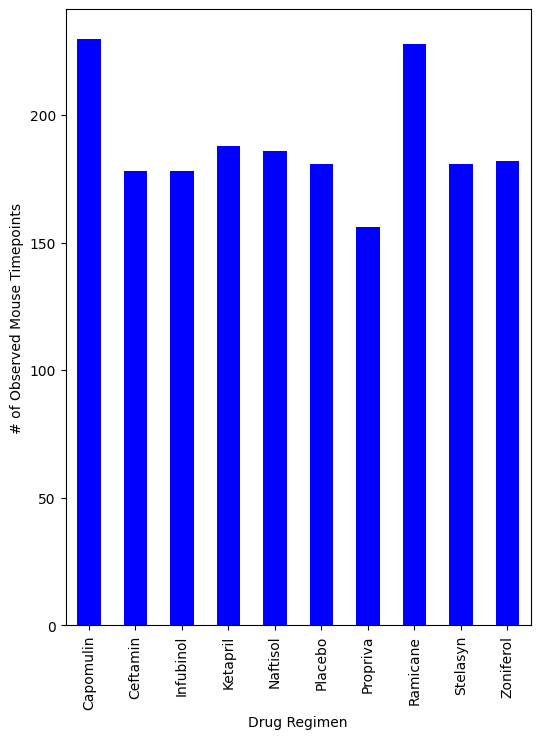

<Figure size 640x480 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drug = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plt_chart = mice_drug.plot(kind="bar", color="b",figsize=(6,8))
plt_chart.set_xlabel("Drug Regimen")
plt_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

# Was trying out some other type of code to see if it changed the bar chart, but it didn't make a difference
plt.tight_layout()

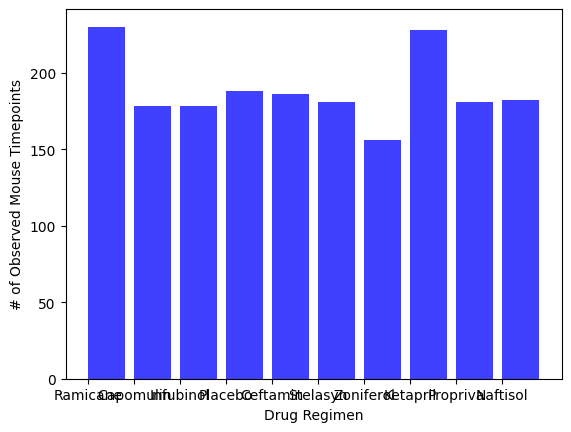

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
type_drug = clean_df["Drug Regimen"].unique()

x_axis = type_drug
y_axis = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis, mice_drug, facecolor="blue", alpha=0.75, align="edge")
plt.show()

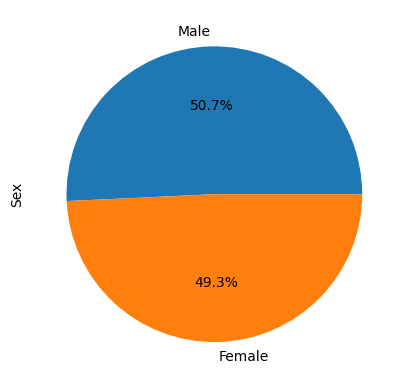

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct = '%1.1f%%')
plt.show()

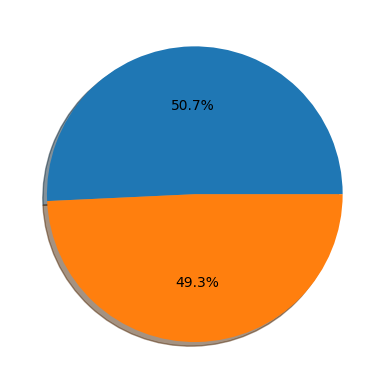

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = clean_df["Sex"].value_counts()
plt.pie(gender_data, autopct="%1.1f%%", shadow =True)
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


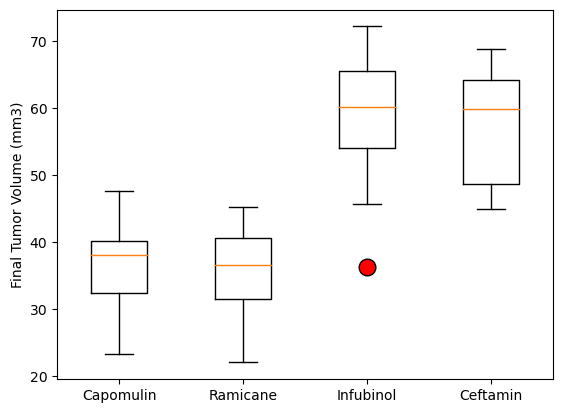

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

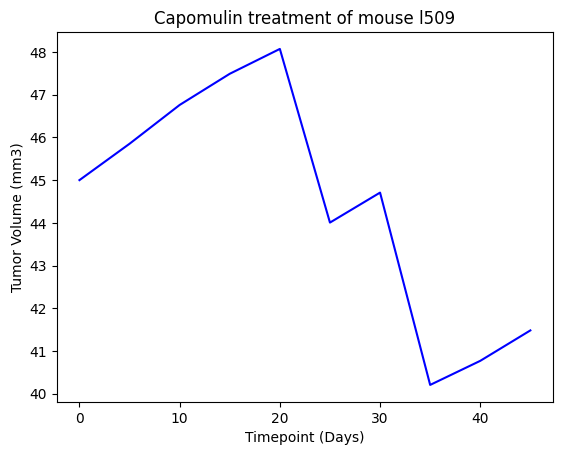

In [12]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df
mouse_capo_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
mouse_capo_df

x_axis = mouse_capo_df["Timepoint"]
tumor_vol = mouse_capo_df["Tumor Volume (mm3)"]

plt.plot(x_axis,tumor_vol, color="blue")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

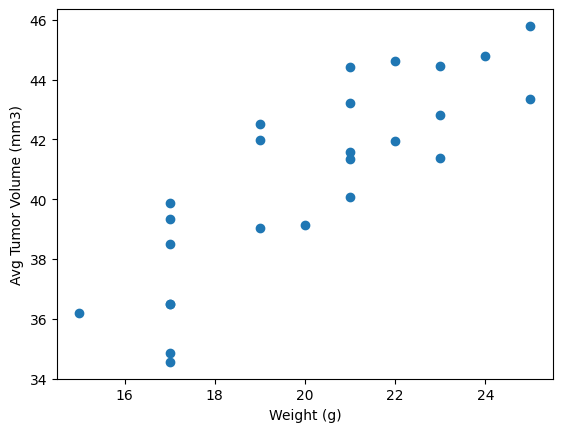

In [13]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avg_capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
mouse_weight_df = avg_capomulin_df["Weight (g)"].unique()
avg_tumor_df = avg_capomulin_df["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight_df,avg_tumor_df)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


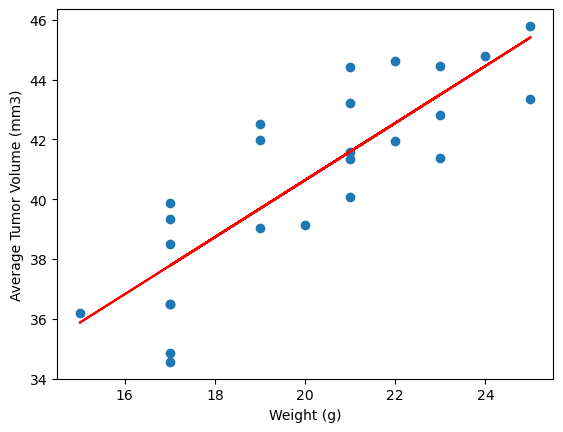

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
mouse_weight_df = avg_capomulin_df["Weight (g)"].unique()
avg_tumor_df = avg_capomulin_df["Tumor Volume (mm3)"].mean()

print(f"The correlation coefficient between Mouse weight and Tumor Volume is {round(st.pearsonr(mouse_weight_df, avg_tumor_df)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight_df, avg_tumor_df)
regress_values = mouse_weight_df * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))

plt.scatter(mouse_weight_df,avg_tumor_df)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")